In [2]:
import numpy as np
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm 
import warnings

from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\abhis\OneDrive\Desktop\ExcelR\delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### Performing EDA On Data

In [4]:
# Checking Datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
#checking null values

data.isnull()

,Delivery Time,Sorting Time
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [7]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [8]:
#check duplicate values

data[data.duplicated()]

,Delivery Time,Sorting Time


In [9]:
data[data.duplicated()].shape

(0, 2)

### Ploting data to check outliers

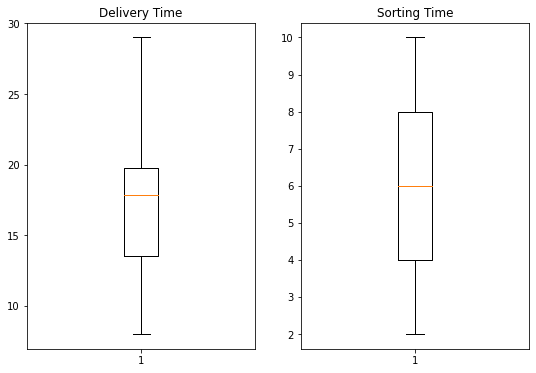

In [11]:
plt.subplots(figsize = (9,6))

plt.subplot(121)
plt.boxplot(data['Delivery Time'])
plt.title('Delivery Time')

plt.subplot(122)
plt.boxplot(data['Sorting Time'])
plt.title('Sorting Time')

plt.show()

### Checking the Correlation between variables

In [12]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

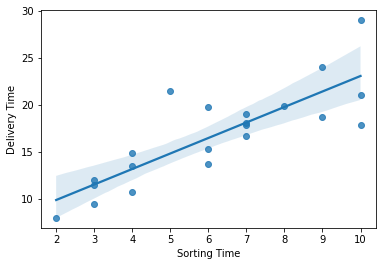

In [13]:
# Visualization correlation between x and y

sns.regplot(x=data['Sorting Time'], y=data['Delivery Time'])

### Checking for Homoscedasticity or Hetroscedasticity

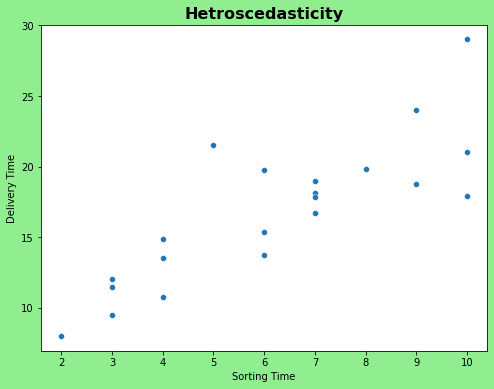

In [14]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = data['Sorting Time'], y = data['Delivery Time'])
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

### Feature Engineering

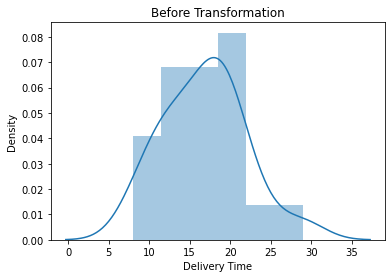

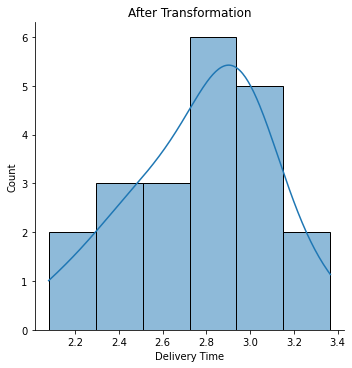

In [15]:
sns.distplot(data['Delivery Time'], bins = 6, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(data['Delivery Time']), bins = 6, kde = True)
plt.title('After Transformation')
plt.show()

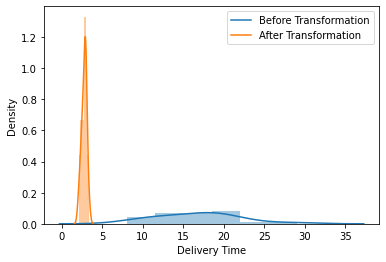

In [17]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['Delivery Time'], bins = 6, kde = True)
sns.distplot(np.log(data['Delivery Time']), bins = 6, kde = True)
plt.legend(labels)
plt.show()

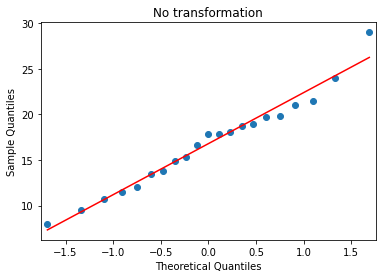

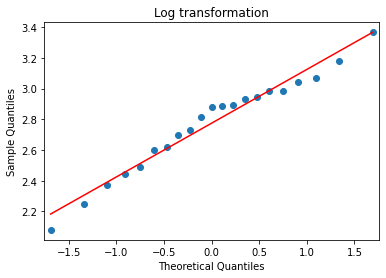

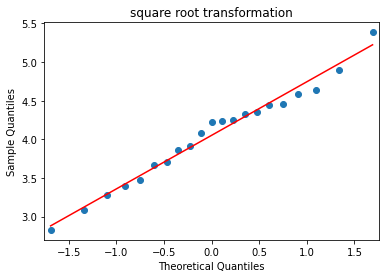

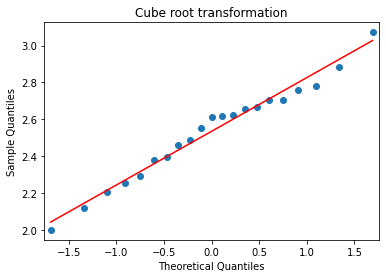

In [21]:
smf.qqplot(data['Delivery Time'], line = 'r')
plt.title('No transformation')

smf.qqplot(np.log(data['Delivery Time']),line = 'r')
plt.title('Log transformation')

smf.qqplot(np.sqrt(data['Delivery Time']), line = 'r')
plt.title('square root transformation')

smf.qqplot(np.cbrt(data['Delivery Time']), line = 'r')
plt.title('Cube root transformation')

plt.show()

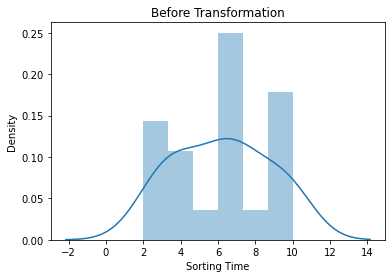

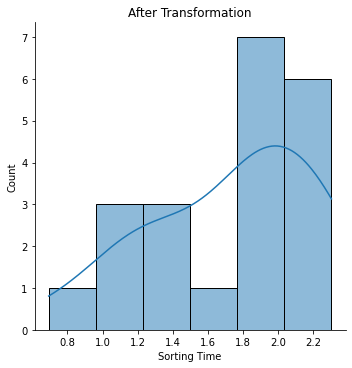

In [22]:
sns.distplot(data['Sorting Time'], bins = 6, kde = True)
plt.title('Before Transformation')

sns.displot(np.log(data['Sorting Time']), bins = 6, kde = True)
plt.title('After Transformation')

plt.show()

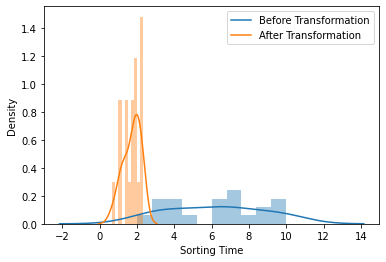

In [23]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['Sorting Time'], bins = 10, kde = True)
sns.distplot(np.log(data['Sorting Time']), bins = 10, kde = True)
plt.legend(labels)

plt.show()

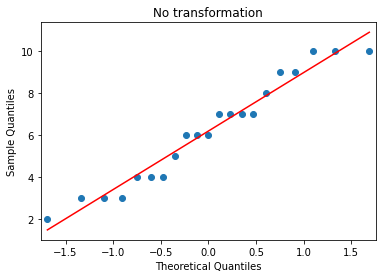

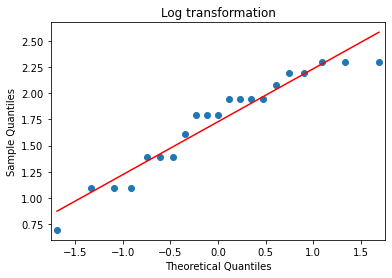

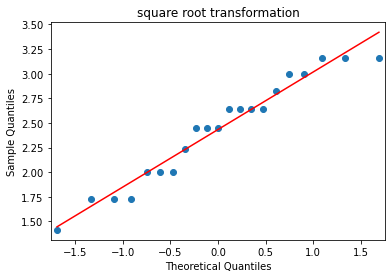

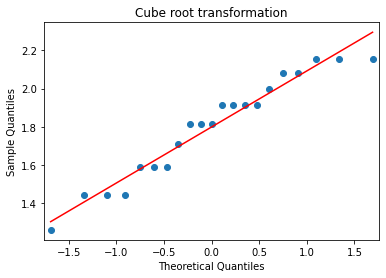

In [25]:
smf.qqplot(data['Sorting Time'], line = 'r')
plt.title('No transformation')

smf.qqplot(np.log(data['Sorting Time']), line = 'r')
plt.title('Log transformation')

smf.qqplot(np.sqrt(data['Sorting Time']), line = 'r')
plt.title('square root transformation')

smf.qqplot(np.cbrt(data['Sorting Time']), line = 'r')
plt.title('Cube root transformation')

plt.show()

### Fitting a Linear Regression Model

In [26]:
# Renaming Columns
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [27]:
model = sm.ols('delivery_time~sorting_time', data = data).fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        21:17:20   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#  Square Root transformation on data

square_root_model = sm.ols('np.sqrt(delivery_time)~np.sqrt(sorting_time)', data = data).fit()
square_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Wed, 23 Nov 2022   Prob (F-statistic):           8.48e-07
Time:                            21:17:34   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
cube_root_model = sm.ols('np.cbrt(delivery_time)~np.cbrt(sorting_time)', data = data).fit()
cube_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(delivery_time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Thu, 24 Nov 2022   Prob (F-statistic):           4.90e-07
Time:                            00:17:35   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(sorting_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#  Log transformation on Data

log_root_model = sm.ols('np.log(delivery_time)~np.log(sorting_time)', data = data).fit()
log_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Thu, 24 Nov 2022   Prob (F-statistic):           1.60e-07
Time:                           00:18:27   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Test

In [33]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [34]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [35]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

### Residual Analysis

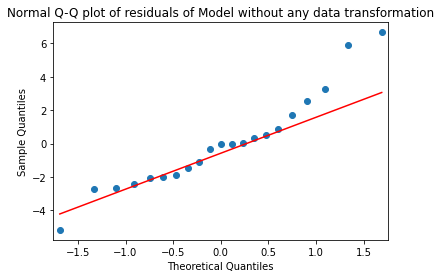

In [36]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

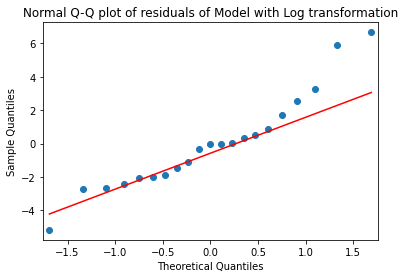

In [43]:
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Log transformation')
plt.show()

### Residual Plot to check Homoscedasticity or Hetroscedasticity

In [44]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

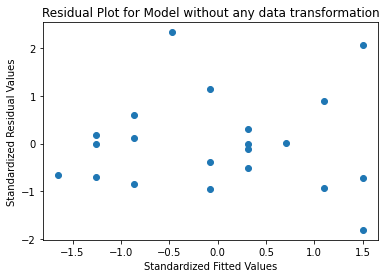

In [45]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

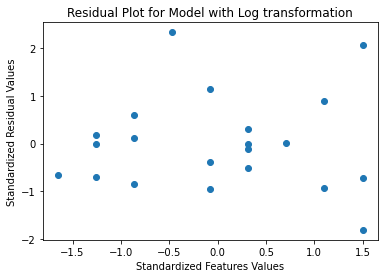

In [47]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model with Log transformation')
plt.xlabel('Standardized Features Values')
plt.ylabel('Standardized Residual Values')
plt.show()

### Model Predictions

In [48]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [49]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [50]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [51]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

# Set 2

In [52]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [55]:
data = pd.read_csv(r"C:\Users\abhis\OneDrive\Desktop\ExcelR\Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Performing EDA On Data

In [56]:
# Checking Data Types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [57]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [58]:
# Checking Null values

data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [59]:
# Checking for Duplicate values

data[data.duplicated()].shape

(0, 2)

In [60]:
data[data.duplicated()]

,YearsExperience,Salary


### Plotting the data to check for outliers

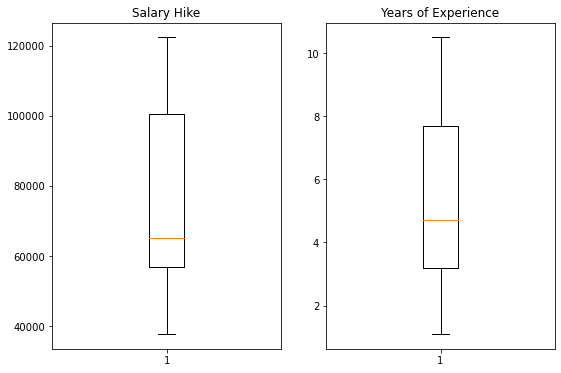

In [62]:
plt.subplots(figsize = (9,6))

plt.subplot(121)
plt.boxplot(data['Salary'])
plt.title('Salary Hike')

plt.subplot(122)
plt.boxplot(data['YearsExperience'])
plt.title('Years of Experience')

plt.show()

### Correlation

In [63]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

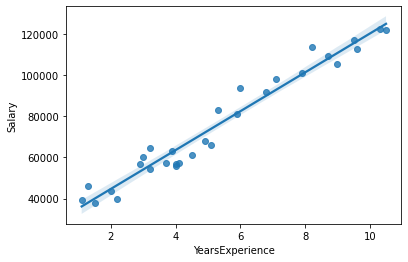

In [64]:
# Visualization of Correlation beteen x and y

sns.regplot(x=data['YearsExperience'],y=data['Salary']) 

### Checking for Homoscedasticity or Hetroscedasticity

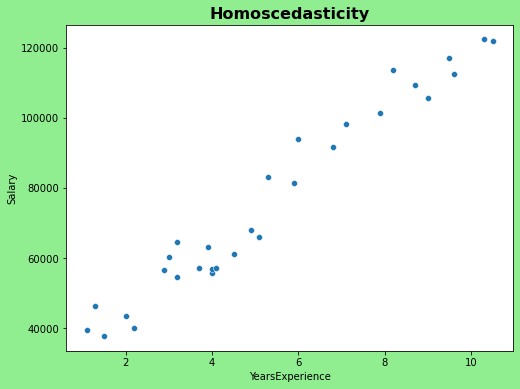

In [65]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = data['YearsExperience'], y = data['Salary'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [66]:
data.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

### Feature Engineering

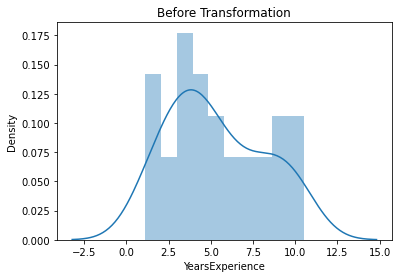

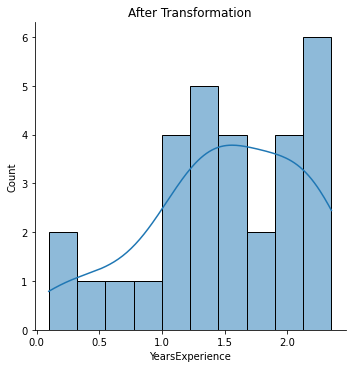

In [68]:
sns.distplot(data['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')

sns.displot(np.log(data['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

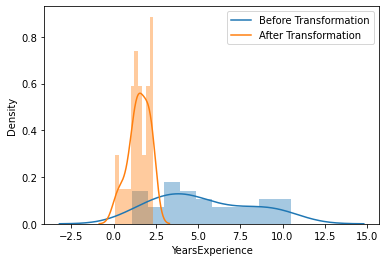

In [69]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(data['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

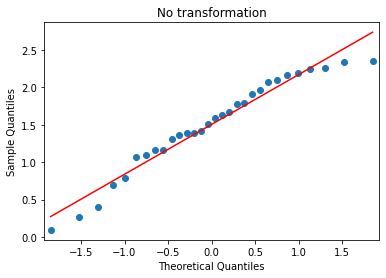

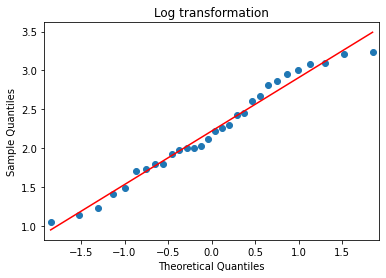

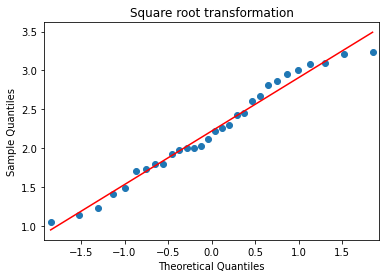

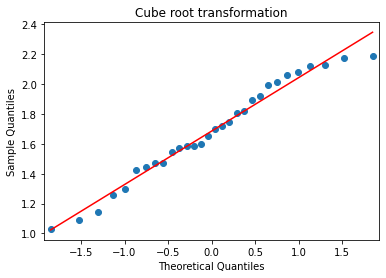

In [72]:
smf.qqplot(np.log(data['YearsExperience']), line = 'r')
plt.title('No transformation')

smf.qqplot(np.sqrt(data['YearsExperience']), line = 'r')
plt.title('Log transformation')

smf.qqplot(np.sqrt(data['YearsExperience']), line = 'r')
plt.title('Square root transformation')

smf.qqplot(np.cbrt(data['YearsExperience']), line = 'r')
plt.title('Cube root transformation')

plt.show()

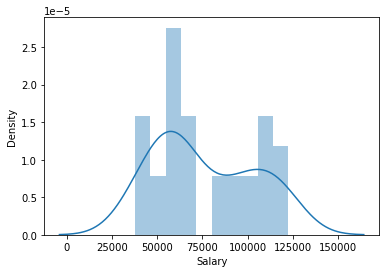

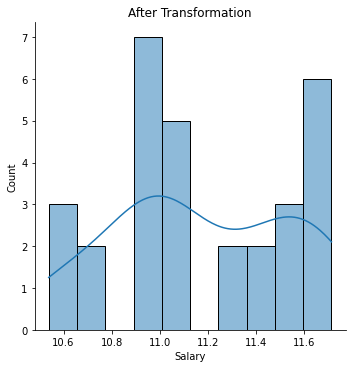

In [73]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['Salary'], bins = 10, kde = True)
sns.displot(np.log(data['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

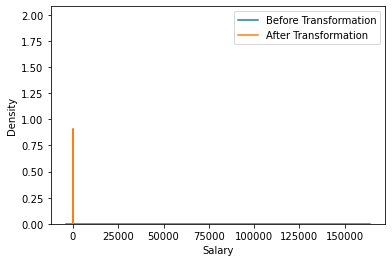

In [74]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['Salary'], bins = 10, kde = True)
sns.distplot(np.log(data['Salary']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

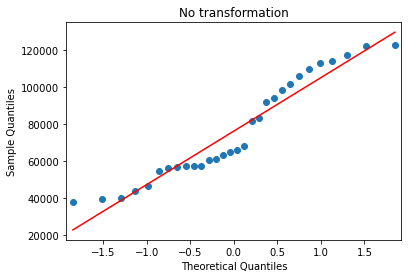

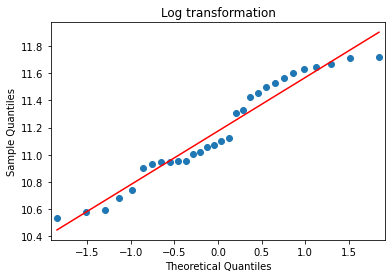

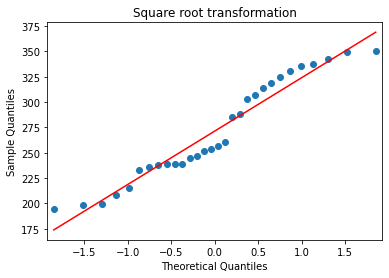

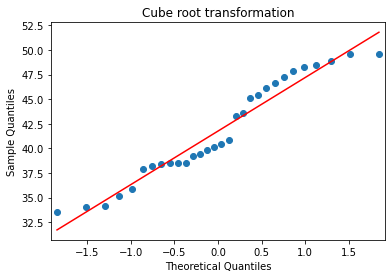

In [76]:
smf.qqplot(data['Salary'], line = 'r')
plt.title('No transformation')

smf.qqplot(np.log(data['Salary']), line = 'r')
plt.title('Log transformation')

smf.qqplot(np.sqrt(data['Salary']), line = 'r')
plt.title('Square root transformation')

smf.qqplot(np.cbrt(data['Salary']), line = 'r')
plt.title('Cube root transformation')

plt.show()

### Fitting a Linear Regression Model

In [77]:
# Using Ordinary least squares (OLS) regression

import statsmodels.formula.api as sm
model = sm.ols('Salary~YearsExperience', data = data).fit()

In [78]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           1.14e-20
Time:                        00:43:50   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
#  Square Root transformation on data

model1 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           7.58e-19
Time:                        00:44:13   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# Cuberoot transformation on Data

model2 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           6.37e-18
Time:                        00:44:25   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
# Log Transformation on Data

model3 = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           7.40e-16
Time:                        00:45:53   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residual Analysis

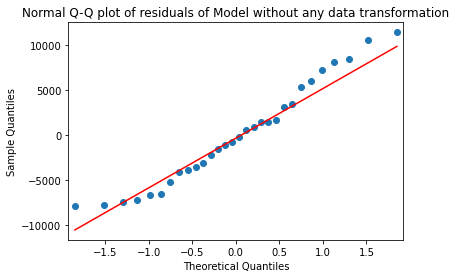

In [90]:
# Test for Normality of Residuals (Q-Q Plot)

import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

In [91]:
# Residual Plot to check Homoscedasticity or Hetroscedasticity


def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

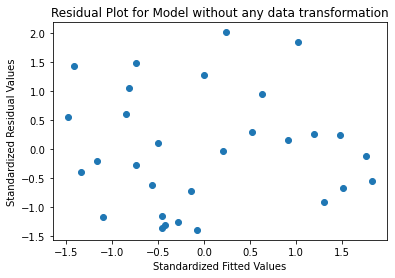

In [94]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')

plt.show()

### Model Testing

In [95]:
# Coefficients

model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [96]:
# t and p-values

print(model.tvalues, '\n' , model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [97]:
# R Squared values

(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

### Predict for new data Point

In [98]:
# Predict for 4.7 and 4.8 

newdata=pd.Series([4.7,6.8])

In [99]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [100]:
model.predict(data_pred)

0    70207.023110
1    90051.943985
dtype: float64

In [103]:
# first model results without any transformation
predicted2 = pd.DataFrame()
predicted2['YearsExperience'] = data.YearsExperience
predicted2['Salary'] = data.Salary
predicted2['Predicted_Salary_Hike'] = pd.DataFrame(model.predict(predicted2.YearsExperience))
predicted2

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
